In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Y116.jpeg to Y116.jpeg


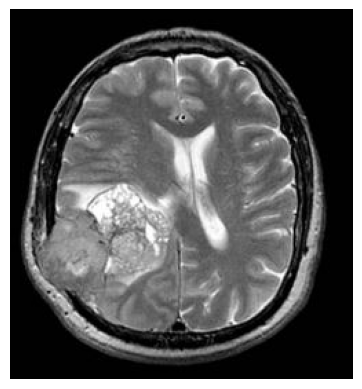

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

image_path = 'Y116.jpeg'
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
import numpy as np

image = image.convert('L')
image_array = np.array(image)

## Smoothing (Gaussian)

In [ ]:
import math

def gaussian_kernel(size, sigma):
    kernel = [[0] * size for _ in range(size)] #Inisialisasi kernel
    center = size // 2 #Inisialisasi pusat dari kernel
    sum_val = 0
    for i in range(size): #Loop setiap baris dalam kernel
        for j in range(size): #Loop setiap kolom dalam kernel
            x = i - center #Menghitung jarak horizontal dari kernel[i][j] ke center
            y = j - center #Menghitung jarak vertikal dari kernel[i][j] ke center
            #Perhitungan Gaussian -> Mengkalikan normalisasi dari distribusi Gaussian dengan eksponensial dari jarak kuadrat dari pusat kernel
            kernel[i][j] = (1 / (2 * math.pi * sigma**2)) * math.exp(-(x**2 + y**2) / (2 * sigma**2)) #Menghitung nilai gaussian pada setiap kernel
            sum_val += kernel[i][j] #Menghitung total keseluruhan nilai pada kernel

    for i in range(size):
        for j in range(size):
            kernel[i][j] /= sum_val #Membagi setiap nilai pada kernel dengan nilai sum_val, agar total semua nilai kernel adalah 1
                                    #Dilakukan untuk menjaga brightness tetap konstan pada image
    return kernel

size = 3  #Ukuran kernel
sigma = 1
kernel = gaussian_kernel(size, sigma)
for row in kernel:
    print(row)

[0.07511360795411151, 0.12384140315297398, 0.07511360795411151]
[0.12384140315297398, 0.2041799555716581, 0.12384140315297398]
[0.07511360795411151, 0.12384140315297398, 0.07511360795411151]


In [ ]:
def apply_gaussian_blur(image, kernel):
    height = len(image) #Menghitung baris
    width = len(image[0]) #Menghitung kolom
    k_size = len(kernel) #Menghitung dimensi kernel
    pad = k_size // 2 #Inisialisasi padding
    new_image = [[0] * width for _ in range(height)] #Inisialisasi variabel untuk menyimpan hasil dari konvolusi

    #Konvolusi
    for i in range(pad, height - pad): #Loop setiap baris image dengan menghindari padding
        for j in range(pad, width - pad): #Loop setiap kolom image
            sum_val = 0
            for ki in range(k_size): #Loop setiap baris kernel
                for kj in range(k_size): #Loop setiap kolom kernel
                    ni = i + ki - pad #Mengambil nilai pada titik baris di image dan kernel dari target konvolusi
                    nj = j + kj - pad #Mengambil nilai pada titik kolom di image dan kernel dari target konvolusi
                    sum_val += image[ni][nj] * kernel[ki][kj] #Mengkalikan nilai image dengan nilai kernel yang sudah diambil
            new_image[i][j] = sum_val #Menyimpan hasil dari konvolusi

    return new_image

In [ ]:
blurred_image = apply_gaussian_blur(image_array, kernel)

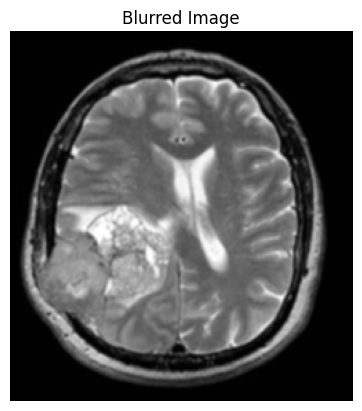

In [ ]:
import matplotlib.pyplot as plt

def display_image(image, title='Image'):
    plt.imshow(image, cmap='gray') #Membuat gambar grayscale
    plt.title(title)
    plt.axis('off')
    plt.show()

display_image(blurred_image, title='Blurred Image')

## Sharpening (Sobel Operation)

In [ ]:
#Mendefinisikan nilai kernel Sobel untuk menghitung gradien
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]], dtype=np.float32)

sobel_y = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]], dtype=np.float32)

def convolve2d(image, kernel):
    img_h, img_w = image.shape #Mengambil jumlah baris dan jumlah kolom dari image
    k_h, k_w = kernel.shape #Mengambil jumlah baris dan jumlah kolom dari kernel

    pad_h = k_h // 2
    pad_w = k_w // 2

    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant') #Membuat image dengan padding

    output = np.zeros_like(image) #Inisialisasi variabel untuk menyimpan hasil konvolusi

    for i in range(img_h): #Loop setiap baris pada image
        for j in range(img_w): #Loop setiap kolom pada image
            roi = padded_image[i:i+k_h, j:j+k_w] #Membuat sub-matriks dari padded_image yang memiliki ukuran yang sama dengan kernel
            output[i, j] = np.sum(roi * kernel) #Mengkalikan nilai pada sub-matriks dengan nilai pada kernel yang disimpan pada variabel output

    return output

In [ ]:
blurred_image_array = np.array(blurred_image) #Membuat array dari image yang sudah di-blur

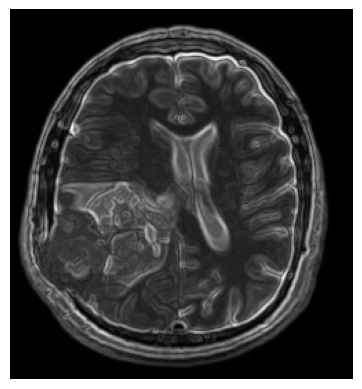

In [ ]:
Gx = convolve2d(blurred_image_array, sobel_x) #Sobel operators untuk mendapatkan gradient horizontal (Gx)
Gy = convolve2d(blurred_image_array, sobel_y) #Sobel operators untuk mendapatkan gradient vertikal (Gy)

magnitude_gradien = np.sqrt(Gx**2 + Gy**2) #Menghitung magnitude gradient (M(x,y))

sharpened_image = blurred_image_array + magnitude_gradien #Menggabungkan nilai image yang sudah di-blur dengan magnitude gradient

plt.imshow(sharpened_image, cmap='gray')
plt.axis('off')
plt.show()

## Hasil Smoothing Gaussian dan Sharpening Sobel

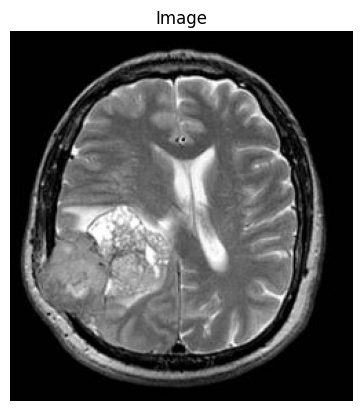

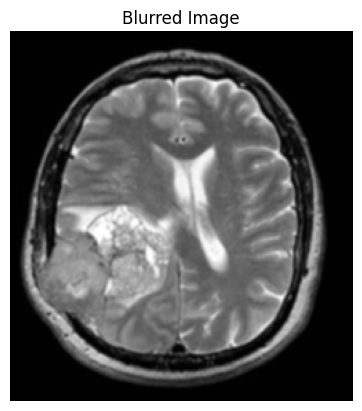

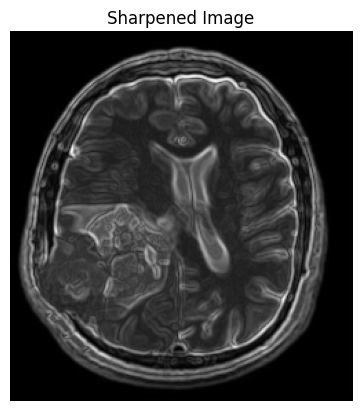

In [ ]:
display_image(image, title='Image')
display_image(blurred_image, title='Blurred Image')
display_image(sharpened_image, title='Sharpened Image')

## Smoothing dengan Box Filter

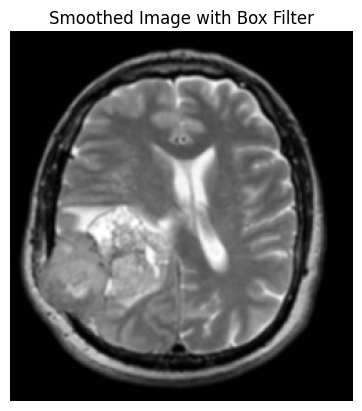

In [ ]:
def box_filter(image, size):
    height = len(image)
    width = len(image[0])
    pad = size // 2
    new_image = [[0] * width for _ in range(height)]

    # Melakukan konvolusi dengan box filter
    for i in range(pad, height - pad):
        for j in range(pad, width - pad):
            sum_val = 0
            for ki in range(size):
                for kj in range(size):
                    ni = i + ki - pad
                    nj = j + kj - pad
                    sum_val += image[ni][nj]
            new_image[i][j] = sum_val / (size * size)

    return new_image

# Contoh penggunaan:
# Misalnya image_array adalah gambar grayscale yang telah diubah menjadi array 2D
size = 3  # Ukuran kernel, misalnya 3x3
smoothed_image = box_filter(image_array, size)

# Menampilkan gambar yang sudah di-smoothing
display_image(smoothed_image, title='Smoothed Image with Box Filter')
